In [81]:
%matplotlib inline
import tqdm
import collections
import sys
import os
import glob
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import time
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Import files

In [2]:
#Set up base directory and file names
base=r'/Users/sky/Desktop/VIP'
files = ['ALC_050319_1_41B_OF_aligned','ALC_050319_1_41B_aligned','ALC_050319_1_41C_aligned',
         'ALC_050319_1_41R_aligned','ALC_050319_1_42B_aligned','ALC_050319_1_42C_aligned',
         'ALC_050319_1_42R_aligned','ALC_050319_1_43B_aligned','ALC_050319_1_43C_aligned',
         'ALC_050319_1_43G_aligned','ALC_050319_1_43R_aligned','ALC_050319_2_44B_aligned',
         'ALC_050319_2_44C_aligned','ALC_050319_2_44R_aligned','ALC_050319_2_45B_aligned',
         'ALC_050319_2_45R_aligned','ALC_050319_2_46B_aligned','ALC_050319_2_46C_aligned',
         'ALC_050319_2_46R_aligned','ALC_051719_1_42Bk_aligned','ALC_051719_1_42G_aligned',
         'ALC_051719_1_45Bk_aligned','ALC_051719_1_45C_aligned','ALC_051719_2_53B_aligned',
         'ALC_051719_2_53C_aligned','ALC_051719_2_53G_aligned','ALC_051719_2_53R_aligned',
         'ALC_051719_2_54B_aligned','ALC_051719_2_54C_aligned',
         'ALC_051719_2_54R_aligned','ALC_051719_2_55B_aligned','ALC_051719_2_55C_aligned',
         'ALC_051719_2_55R_aligned','ALC_060519_1_49B_aligned','ALC_060519_1_49C_aligned',
         'ALC_060519_1_49R_aligned','ALC_060519_2_48B_aligned','ALC_060519_2_48C_aligned',
         'ALC_060519_2_48R_aligned','ALC_060519_2_57B_aligned','ALC_060519_2_57C_aligned',
         'ALC_060519_2_57G_aligned','ALC_060519_2_57R_aligned','ALC_060519_2_58B_aligned',
         'ALC_060519_2_58C_aligned','ALC_060519_2_58R_aligned','ALC_070519_1_21B_aligned',
         'ALC_070519_1_21C_aligned','ALC_070519_1_21R_aligned','ALC_070519_1_31B_aligned',
         'ALC_070519_1_31C_aligned','ALC_070519_1_31R_aligned','ALC_070519_1_60B_aligned',
         'ALC_070519_1_60C_aligned','ALC_070519_1_60G_aligned','ALC_070519_1_60R_aligned']

In [6]:
#Read files
start_time = time.time()


files = glob.glob(os.path.join(base,"*.analysis"))
dataframes = (pd.read_pickle(f) for f in files)
big_dataframe = pd.concat(dataframes, ignore_index=True)

print("---Read data: %s seconds ---" % (time.time() - start_time))

---Read data: 0.4613659381866455 seconds ---


In [7]:
#data info
big_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017889 entries, 0 to 1017888
Data columns (total 13 columns):
(raw_centroid, x)       1002138 non-null float64
(raw_centroid, y)       1002138 non-null float64
angle_from_veridical    1002138 non-null float64
(centroid, x)           1002138 non-null float64
(centroid, y)           1002138 non-null float64
(snout, x)              1002138 non-null float64
(snout, y)              1002138 non-null float64
(tail_base, x)          999382 non-null float64
(tail_base, y)          999382 non-null float64
(l_ear, x)              1001755 non-null float64
(l_ear, y)              1001755 non-null float64
(r_ear, x)              1001489 non-null float64
(r_ear, y)              1001489 non-null float64
dtypes: float64(13)
memory usage: 101.0 MB


# Data cleaning

In [8]:
big_dataframe.isnull().sum()

(raw_centroid, x)       15751
(raw_centroid, y)       15751
angle_from_veridical    15751
(centroid, x)           15751
(centroid, y)           15751
(snout, x)              15751
(snout, y)              15751
(tail_base, x)          18507
(tail_base, y)          18507
(l_ear, x)              16134
(l_ear, y)              16134
(r_ear, x)              16400
(r_ear, y)              16400
dtype: int64

In [9]:
big_dataframe = big_dataframe.dropna()

# K means clustering

In [117]:
x = big_dataframe.iloc[:, [0,1,2,5,6,7,8,9,10,11,12]].values

In [14]:
# Elbow method
start_time = time.time()
Error =[]
for i in range(3, 7):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
    print(i)


print("---Elbow method: %s seconds ---" % (time.time() - start_time))

3
4
5
6
---Elbow method: 90.02922797203064 seconds ---


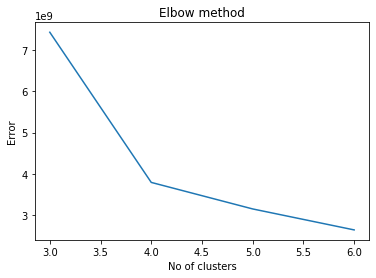

In [15]:
plt.plot(range(3, 7), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [21]:
start_time = time.time()
kmeans4 = KMeans(n_clusters=4)
pred_kmeans4 = kmeans4.fit_predict(x)
print("--- K means: %s seconds ---" % (time.time() - start_time))

--- K means: 8.905986070632935 seconds ---


In [17]:
pred_kmeans4.shape

(998648,)

In [18]:
big_dataframe['Pred'] = pred_kmeans4

In [19]:
big_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998648 entries, 116 to 1017888
Data columns (total 14 columns):
(raw_centroid, x)       998648 non-null float64
(raw_centroid, y)       998648 non-null float64
angle_from_veridical    998648 non-null float64
(centroid, x)           998648 non-null float64
(centroid, y)           998648 non-null float64
(snout, x)              998648 non-null float64
(snout, y)              998648 non-null float64
(tail_base, x)          998648 non-null float64
(tail_base, y)          998648 non-null float64
(l_ear, x)              998648 non-null float64
(l_ear, y)              998648 non-null float64
(r_ear, x)              998648 non-null float64
(r_ear, y)              998648 non-null float64
Pred                    998648 non-null int32
dtypes: float64(13), int32(1)
memory usage: 110.5 MB


In [20]:
big_dataframe.tail()

,"(raw_centroid, x)","(raw_centroid, y)",angle_from_veridical,"(centroid, x)","(centroid, y)","(snout, x)","(snout, y)","(tail_base, x)","(tail_base, y)","(l_ear, x)","(l_ear, y)","(r_ear, x)","(r_ear, y)",Pred
1017884,307.313210,316.487516,2.352120,0.0,0.0,-7.105427e-15,-32.874967,10.480691,14.190378,-6.144982,-22.815012,3.924720,-23.562479,2
1017885,307.365973,315.698735,2.336214,0.0,0.0,-3.552714e-15,-33.148298,10.787304,15.818316,-6.791954,-22.363378,3.451469,-23.530812,2
1017886,306.831452,315.190974,2.361027,0.0,0.0,-1.065814e-14,-33.943144,9.997830,15.615699,-5.492994,-21.990804,4.153983,-24.589032,2
1017887,306.959805,314.813179,2.352123,0.0,0.0,0.000000e+00,-35.814314,10.185058,15.139848,-5.676737,-22.930725,4.401436,-25.457475,2
1017888,307.009811,314.764299,2.340117,0.0,0.0,0.000000e+00,-35.994965,10.626041,15.041492,-5.912229,-23.280228,4.347524,-25.513957,2


# PCA 

In [173]:
def behavior_pca(feature,sd):
    # Select features
    x = big_dataframe.iloc[:, feature].values

    # PCA with or without standardization
    pca = PCA()
    if sd == 0:
        x_transformed = pca.fit_transform(x)
    else:
        x_sd = StandardScaler().fit_transform(x)
        x_transformed = pca.fit_transform(x_sd)

    PCA_components = pd.DataFrame(x_transformed)
    
    features = range(pca.n_components_)

    fig = plt.figure(figsize=(15, 3))
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)

    #fig.suptitle('PCA Analysis')

    # Plot the explained variances by each PC
    ax1.bar(features, pca.explained_variance_ratio_, color='blue')
    ax1.title.set_text('Variance Explained by Single PC')

    # Plot the cumulative explained variances
    # Cumulative sum of variance explained with [n] features
    var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

    ax2.bar(features, var, color='blue')
    ax2.title.set_text('cumulative Variance Explained')


    # Plot the first two PC with predicted cluster
    PCA_components['Pred'] = pred_kmeans4
    ax3.scatter(PCA_components[0], PCA_components[1], c =PCA_components['Pred'], s = 0.01,alpha=.1)
    ax3.title.set_text('First Two PC with Predicted Cluster')

    plt.show()
    return(PCA_components)

    
    

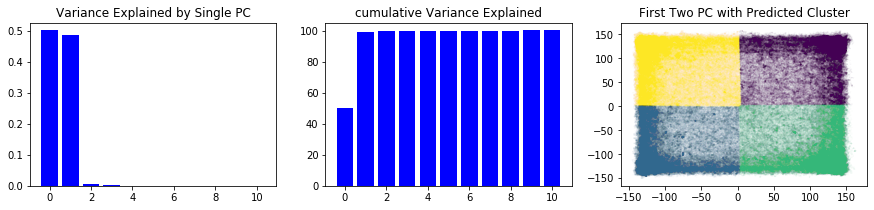

In [170]:
# All columns, no standardization
a = behavior_pca([0,1,2,5,6,7,8,9,10,11,12],0)

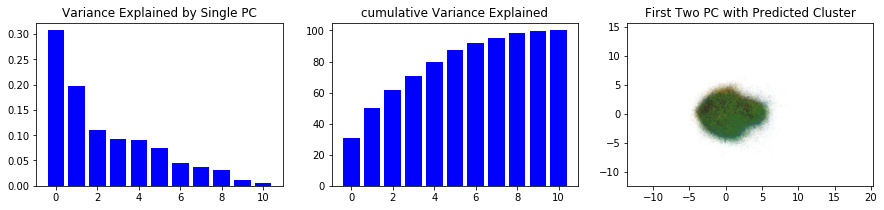

In [166]:
# All columns,  standardization
behavior_pca([0,1,2,5,6,7,8,9,10,11,12],1)

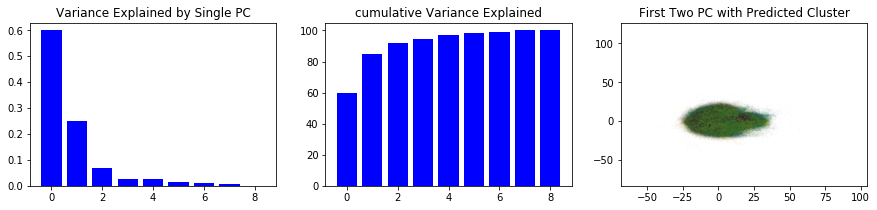

In [168]:
# no row centoid, no standardization
behavior_pca([2,5,6,7,8,9,10,11,12],0)

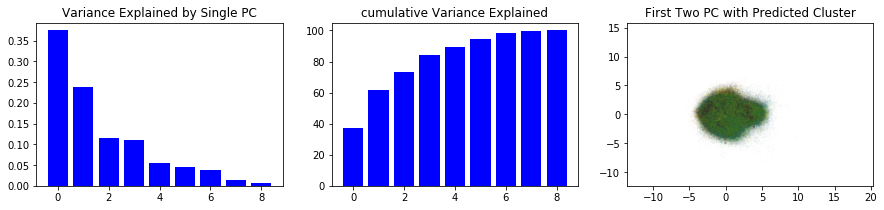

In [167]:
# no row centoid,  standardization
behavior_pca([2,5,6,7,8,9,10,11,12],1)

# Export data

In [24]:
big_dataframe.to_pickle('Behavior_PredCluster200403.pkl')